In [1]:
!pip install python-barcode[images]
!pip install qrcode
!apt install libzbar0
!pip install pyzbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 KB 7.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40400 sha256=225ecae8611f5224236b8a07d64e26e907f7cefb1f79b04b6970434663a4c9ba
  Stored in directory: /root/.cache/pip/wheels/35/fd/04/2768886c56207acee0d6dc6b9bd5d06dac63a810f0c0a42516
Successfully built qrcode
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 23 not upgrade

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 


In [3]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

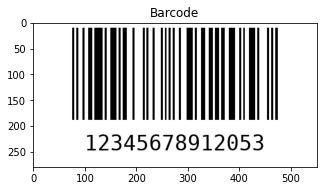

In [5]:
from barcode import EAN14
from barcode.writer import ImageWriter

with open('barcode.png','wb') as f:
  EAN14('1234567891205', writer = ImageWriter()).write(f)

barcode=cv2.imread("barcode.png")
imshow("Barcode", barcode)


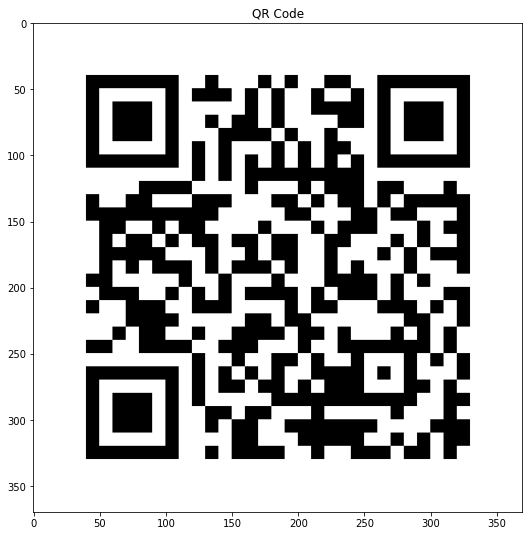

In [8]:
import qrcode
from PIL import Image

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

qr.add_data("https://www.opencv.org")

qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")
img.save("qrcode.png")

qrcode = cv2.imread("qrcode.png")
imshow("QR Code", qrcode, size = 9)

In [9]:
#DECODING QR CODES

from pyzbar.pyzbar import decode
from PIL import Image

img = Image.open('qrcode.png')
result = decode(img)
for i in result:
  print(i.data.decode("utf-8"))

https://www.opencv.org


In [10]:
!wget https://i.stack.imgur.com/1DwED.jpg

--2023-01-19 12:10:42--  https://i.stack.imgur.com/1DwED.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.20.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.20.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439449 (429K) [image/jpeg]
Saving to: ‘1DwED.jpg’

1DwED.jpg           100%[===================>] 429.15K  --.-KB/s    in 0.03s   

2023-01-19 12:10:42 (16.6 MB/s) - ‘1DwED.jpg’ saved [439449/439449]



[Point(x=558, y=938), Point(x=588, y=1288), Point(x=916, y=1275), Point(x=875, y=896)]
QR Code revealed: http://ruthenus.pl (QRCODE)


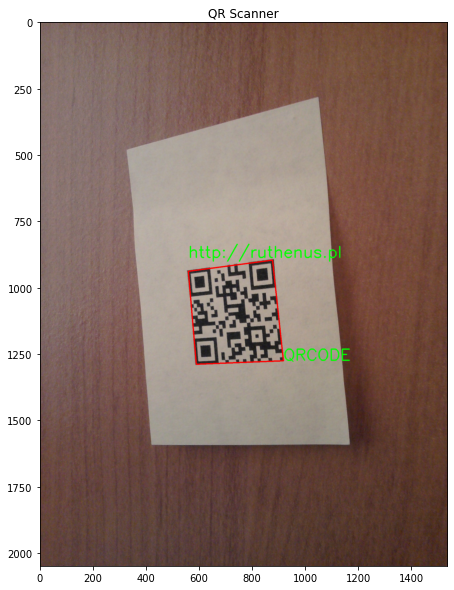

In [11]:
#DETECT QR CODES

from pyzbar.pyzbar import decode

image = cv2.imread("1DwED.jpg")

# Detect and decode the qrcode
codes = decode(image)

# loop over the detected barcodes
for bc in codes:
  # Get the rect coordiantes for our text placement
  (x, y, w, h) = bc.rect
  print(bc.polygon)
  pt1,pt2,pt3,pt4 = bc.polygon

  # Draw a bounding box over our detected QR code
  pts = np.array( [[pt1.x,pt1.y], [pt2.x,pt2.y], [pt3.x,pt3.y], [pt4.x,pt4.y]], np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(image, [pts], True, (0,0,255), 3)

  # extract the string info data and the type from our object
  barcode_text = bc.data.decode()
  barcode_type = bc.type

  
  text = "{} ({})".format(barcode_text, barcode_type)
  cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  print("QR Code revealed: {}".format(text))

# display our output
imshow("QR Scanner", image, size = 10)

In [12]:
!wget https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg

--2023-01-19 12:12:27--  https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg
Resolving www.differencebetween.com (www.differencebetween.com)... 104.21.75.79, 172.67.217.144, 2606:4700:3034::ac43:d990, ...
Connecting to www.differencebetween.com (www.differencebetween.com)|104.21.75.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79365 (78K) [image/jpeg]
Saving to: ‘1024px-ISBN.jpg’

1024px-ISBN.jpg     100%[===================>]  77.50K  --.-KB/s    in 0.009s  

2023-01-19 12:12:27 (8.87 MB/s) - ‘1024px-ISBN.jpg’ saved [79365/79365]



Barcode revealed: 9780863815805
Barcode revealed: 9780863815805


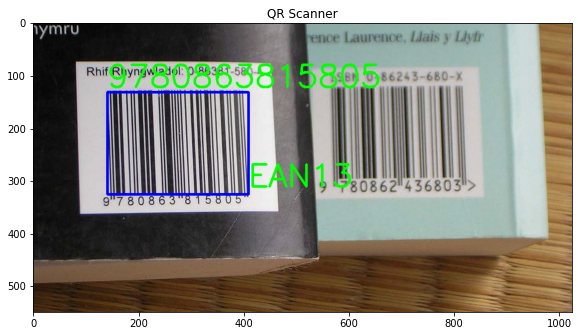

In [13]:
from pyzbar.pyzbar import decode

image = cv2.imread("1024px-ISBN.jpg")

# Detect and decode the qrcode
barcodes = decode(image)

# loop over the detected barcodes
for bc in barcodes:
  # Get the rect coordiantes for our text placement
  (x, y, w, h) = bc.rect
  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)

  # extract the string info data and the type from our object
  barcode_text = bc.data.decode()
  barcode_type = bc.type

  # show our 
  text = "{} ({})".format(barcode_text, barcode_type)
  cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  print("Barcode revealed: {}".format(barcode_text))
  print("Barcode revealed: {}".format(barcode_text))

# display our output
imshow("QR Scanner", image, size = 18)